## Lab 6
#### My Name is ??
#### In collaboration with ?? 

<b>Task 1</b><br>
Sample 100 values from a binomial distribution with $n=100$ and $p =0.25$. 
Calculate the sample mean $\mu_X$ and sample variance $\sigma_X^2$ of the sampled using the formulae 
$$\mu_X =\frac{1}{n} \sum_{j=1}^{n} x_j$$
$$\sigma_X^2 = \frac{1}{n-1}\sum_{j=1}^{n} (x_j-\mu )^2. $$
Compare these values with the theoretical values for the exponential distribution $\mu = np$ and $\sigma^2 = np(1-p)$.

In [16]:
import numpy as np
from matplotlib import pyplot as plt 

def sample_mean(data):
    n = len(data)
    return 1/n *sum(data)

def sample_variance(data):
    mu = sample_mean(data)
    n = len(data)
    return 1/(n-1)*sum((data-mu)**2)

samples = np.random.binomial(100,0.25,1000)
mux=sample_mean(samples)
sigx=sample_variance(samples)
mu = 100*0.25
sig =100*0.25*0.75

print(f"the sample mean is {mux} and the sample variance is {sigx}, compared to the theoretical mean of {mu} and sample variance of {sig}")

the sample mean is 24.744 and the sample variance is 19.774238238238215, compared to the theoretical mean of 25.0 and sample variance of 18.75


<b>Task 2</b><br>
Plot a histogram of the sampled data. On the same axes, plot the pdf for a normal distribution with with the theoretical mean and variance from task 1. In a markdown box, explain what you see. Based on this visual inspection, do you think the data are normally distributed?

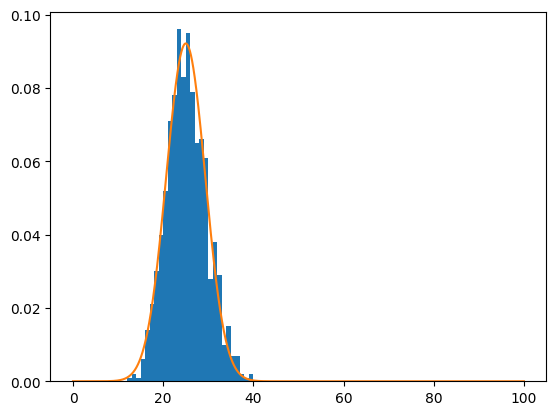

In [17]:
import scipy as sp

plt.hist(samples, bins=range(101), density =True);
xvals = np.linspace(0,100,5000)
yvals = [sp.stats.norm.pdf(x,mu,np.sqrt(sig)) for x in xvals]
plt.plot(xvals,yvals)

<b>Task 3</b><br>
Create a function to calculuate the empirical density function of the data. Plot the empirical density function on the same axes as the cdf for the normal distribution in task 2. In a markdown box, describe what you notice.  

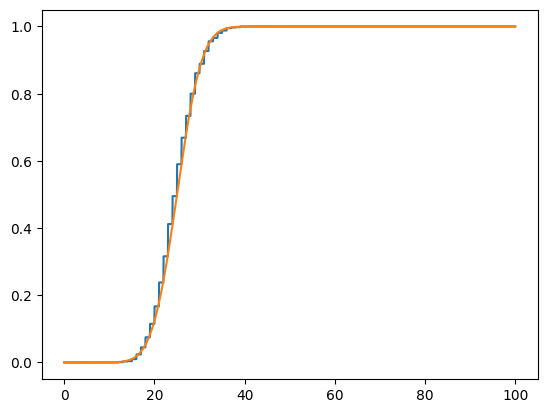

In [18]:
def empirical(data,x):
    n = len(data)
    count = 0
    for d in data:
        if d < x:
            count += 1
    return count/n

emp_vals = [empirical(samples,x) for x in xvals]
cdf_vals = [sp.stats.norm.cdf(x,mu,np.sqrt(sig)) for x in xvals]

plt.plot(xvals,emp_vals, label = "empirical density function")
plt.plot(xvals,cdf_vals, label = "cumulative density function")

<b>Task 4</b><br>
Create a function that calculates the test statistic $D_n$. Use this function to conduct a hypothesis test to determine if $D_n$ is different from zero with significance $\alpha = 0.05$. I.e. you should reject the null hypothesis if  $D_n > K_\alpha$ where you can find the critical value $K_\alpha$ using `scipy.stats.kstwobign.ppf(1-alpha)`.

In a markdown box, explain what you are using as your null hypothesis, what the alternative hypothesis is, and what you conclude from your hypothesis test.

In [19]:
alpha = 0.05

Dn = np.sqrt(len(samples))*np.max(np.abs(np.array(emp_vals)-np.array(cdf_vals)))
Ka = sp.stats.kstwobign.ppf(1-alpha)

if Dn > Ka:
    print("We reject the null hypothesis since Dn>Ka. Therefore the values are not normally distributed.")
    print(f"Dn = {Dn}")
    print(f"Ka = {Ka}")
else:
    print("We fail to reject the null hypothesis since Dn<Ka. Therefore the values might be normally distributed.")


We reject the null hypothesis since Dn>Ka. Therefore the values are not normally distributed.
Dn = 2.8314796709374703
Ka = 1.3580986393225505


The null hypothesis is that the two distributions are the same. In terms of the test-statistic, this means that $D_n$ is zero. We can reject the null hypothesis if $D_n > K_\alpha$. 

<b>Task 5</b><br>
Sample 1000 values from an exponential distribution with $\lambda = 2$. Implement the same procedure as in tasks 1-4 with these data to determine if they are normally distributed. 